# Notebook Setup

BEFORE running this Notebook we assume the following 

* This notebook runs with Python Version `>= 3`

* `conda` si up-to-date. If not, in the terminal (Linux/Mac) or the `Conda Prompt` (Windows)

```bash
conda update --all
```

__Package requirements__

<span style='color:red'> <b> IMPORTANT </b> </span> 

* DO RUN the following lines, only if the current Notebook doesn't execute properly.
* DON'T RUN the following lines, if `requirements.txt` already satisfied or if Notebook runs fine. 

If `pip` not installed within `conda` environment, execute the cell below

```bash
conda install pip==20.0.2
```

__NOTE__ Wait for the above cell to finish executing before executing the next cell.

Install _package dependencies_

```bash
pip install -r requeriments.txt
```

# Cirque potential 

\begin{equation}
    V(x, y) = -C_6 \left[ \dfrac{1}{\left(\beta\left[\left(x - x_e\right)^2 + y^2\right] + \alpha\right)^3} + \dfrac{1}{\left(\beta\left[\left(x + x_e\right)^2 + y^2\right] + \alpha\right)^3} \right]
\end{equation}

In [28]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

Take the slice of the potential, $y = 0$ 

In [169]:
# Potential parameters
c_6 = 1/2
alpha = 1
beta = 1/8
x_e = 5
PARAMETERS = [c_6, alpha, beta, x_e]

In [179]:
def V(x, y, PARAMETERS):
    c_6, alpha, beta, x_e = PARAMETERS
    return - c_6/(beta*( (x - x_e)**2 + y**2) + alpha )**3

In [191]:
PARAMETERS_right = [c_6, alpha, beta, x_e]
PARAMETERS_left = [c_6, alpha, beta, -x_e]

# Plot Potential slice $y = 0$

In [192]:
x = numpy.linspace(-15,15,100) # Points along X-axis
y = numpy.zeros(100)
V_double = V(x, y, PARAMETERS_left) + V(x, y, PARAMETERS_right)

<IPython.core.display.Javascript object>


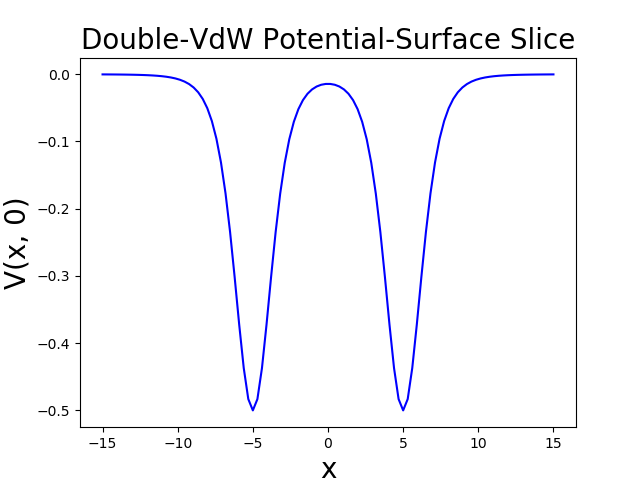

In [193]:
fig,ax = plt.subplots(1,1)

ax.plot(x, V_double,c='blue')

# Customise plot
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('V(x, 0)', fontsize=20)
ax.set_title("Double-VdW Potential-Surface Slice", fontsize=20)

fig.savefig('figures/double-vdw_slice.png')
plt.show()

# Potential Surface in 3D

<IPython.core.display.Javascript object>


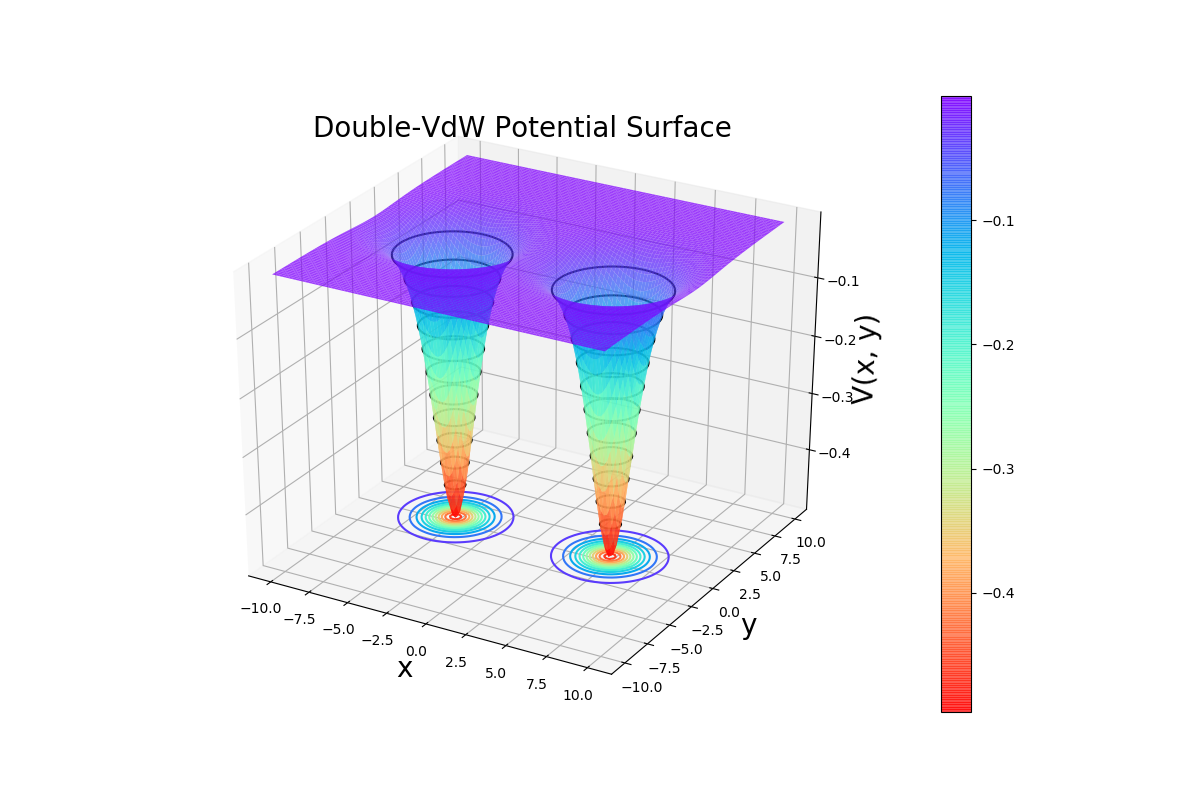

In [194]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8), dpi=100)
ax = fig.add_subplot(111, projection="3d")

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

V_double =  V(X, Y, PARAMETERS_right) + V(X, Y, PARAMETERS_left)
Z = V_double

cmap = 'rainbow_r' # Colormap
n_clines = 15
# Plot potential energy surface 
surf = ax.plot_surface(X, Y, Z, cmap=cmap, rstride = 1, cstride = 1, linewidth = 0, alpha=0.75)

# Plot contour of surface projection on XY plane
ax.contour(X, Y, Z, n_clines, zdir='z', offset=Z.min(), cmap=cmap)

# Plot contour lines placed on surface 
ax.contour(X, Y, Z, n_clines, colors="black", linestyles="solid", linewidths=1.5, alpha=1)

fig.colorbar(surf) # Add colorbar to surface object

# Customise plot appearance
ax.set_title("Double-VdW Potential Surface", fontsize=20)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('V(x, y)', fontsize=20)

fig.savefig('figures/double-vdw_surface.png')

plt.show()

# Hessian calculation 

## Define potential function $V(x, y)$

In [1]:
import sympy 

In [13]:
alpha, beta, c, d = sympy.symbols('alpha beta C_6 d')
x, y = sympy.symbols('x y')

In [18]:
V = -c*(1/(beta*((x - d)**2 + y**2) + alpha)**3 + 1/(beta*((x + d)**2 + y**2) + alpha)**3)
V

-C_6*((alpha + beta*(y**2 + (d + x)**2))**(-3) + (alpha + beta*(y**2 + (-d + x)**2))**(-3))

## Compute first derivatives

The negative of these derivatives will be the last 2 components of the Hamilton's vector field

In [16]:
dx_V = sympy.diff(V, x)
dx_V

-C_6*(-3*beta*(2*d + 2*x)/(alpha + beta*(y**2 + (d + x)**2))**4 - 3*beta*(-2*d + 2*x)/(alpha + beta*(y**2 + (-d + x)**2))**4)

In [17]:
dy_V = sympy.diff(V, y)
dy_V

-C_6*(-6*beta*y/(alpha + beta*(y**2 + (d + x)**2))**4 - 6*beta*y/(alpha + beta*(y**2 + (-d + x)**2))**4)

## Compute second derivatives

In [27]:
dxx_V = sympy.diff(V, x, x)
dxx_V

-6*C_6*beta*(8*beta*(d + x)**2/(alpha + beta*(y**2 + (d + x)**2))**5 + 8*beta*(d - x)**2/(alpha + beta*(y**2 + (d - x)**2))**5 - 1/(alpha + beta*(y**2 + (d + x)**2))**4 - 1/(alpha + beta*(y**2 + (d - x)**2))**4)

In [28]:
dyy_V = sympy.diff(V, y, y)
dyy_V

-6*C_6*beta*(8*beta*y**2/(alpha + beta*(y**2 + (d + x)**2))**5 + 8*beta*y**2/(alpha + beta*(y**2 + (d - x)**2))**5 - 1/(alpha + beta*(y**2 + (d + x)**2))**4 - 1/(alpha + beta*(y**2 + (d - x)**2))**4)

In [29]:
dxy_V = sympy.diff(V, x, y)
dxy_V

-48*C_6*beta**2*y*((d + x)/(alpha + beta*(y**2 + (d + x)**2))**5 - (d - x)/(alpha + beta*(y**2 + (d - x)**2))**5)

## Construct Hessian

In [83]:
H = sympy.Matrix([
    [dxx_V, dxy_V],
    [dxy_V, dyy_V]
])
H

Matrix([
[-6*C_6*beta*(8*beta*(d + x)**2/(alpha + beta*(y**2 + (d + x)**2))**5 + 8*beta*(d - x)**2/(alpha + beta*(y**2 + (d - x)**2))**5 - 1/(alpha + beta*(y**2 + (d + x)**2))**4 - 1/(alpha + beta*(y**2 + (d - x)**2))**4),                                                                                       -48*C_6*beta**2*y*((d + x)/(alpha + beta*(y**2 + (d + x)**2))**5 - (d - x)/(alpha + beta*(y**2 + (d - x)**2))**5)],
[                                                                                                  -48*C_6*beta**2*y*((d + x)/(alpha + beta*(y**2 + (d + x)**2))**5 - (d - x)/(alpha + beta*(y**2 + (d - x)**2))**5), -6*C_6*beta*(8*beta*y**2/(alpha + beta*(y**2 + (d + x)**2))**5 + 8*beta*y**2/(alpha + beta*(y**2 + (d - x)**2))**5 - 1/(alpha + beta*(y**2 + (d + x)**2))**4 - 1/(alpha + beta*(y**2 + (d - x)**2))**4)]])

## Evaluate Hessian at critical points

Three (out of nine) obvious critical points are $(0,0), (d, 0), (0, -d)$, respectively. 

$H(x, 0) = $

In [94]:
Hx = H.subs(y,0)
Hx

Matrix([
[-6*C_6*beta*(8*beta*(d + x)**2/(alpha + beta*(d + x)**2)**5 + 8*beta*(d - x)**2/(alpha + beta*(d - x)**2)**5 - 1/(alpha + beta*(d + x)**2)**4 - 1/(alpha + beta*(d - x)**2)**4),                                                                              0],
[                                                                                                                                                                              0, -6*C_6*beta*(-1/(alpha + beta*(d + x)**2)**4 - 1/(alpha + beta*(d - x)**2)**4)]])

In [99]:
sympy.simplify(Hx[0,0])

6*C_6*alpha*beta/(alpha + beta*(d + x)**2)**5 + 6*C_6*alpha*beta/(alpha + beta*(d - x)**2)**5 - 42*C_6*beta**2*(d + x)**2/(alpha + beta*(d + x)**2)**5 - 42*C_6*beta**2*(d - x)**2/(alpha + beta*(d - x)**2)**5

In [100]:
sympy.simplify(Hx[1,1])

6*C_6*beta/(alpha + beta*(d + x)**2)**4 + 6*C_6*beta/(alpha + beta*(d - x)**2)**4

$H(0,0)$ = 

In [51]:
substitutions = [(x, 0), (y,0)]
H0 = H.subs(substitutions)
H0

Matrix([
[-6*C_6*beta*(16*beta*d**2/(alpha + beta*d**2)**5 - 2/(alpha + beta*d**2)**4),                                  0],
[                                                                           0, 12*C_6*beta/(alpha + beta*d**2)**4]])

Simplify expressions for diagonal entries 

In [76]:
sympy.simplify(sympy.simplify(H0[0,0]))

12*C_6*beta*(alpha - 7*beta*d**2)/(alpha + beta*d**2)**5

In [78]:
sympy.simplify(H0[1,1])

12*C_6*beta/(alpha + beta*d**2)**4

$H(d,0)$ = 

In [52]:
substitutions = [(x, d), (y,0)]
H_plus = H.subs(substitutions)
H_plus

Matrix([
[-6*C_6*beta*(32*beta*d**2/(alpha + 4*beta*d**2)**5 - 1/(alpha + 4*beta*d**2)**4 - 1/alpha**4),                                                      0],
[                                                                                            0, -6*C_6*beta*(-1/(alpha + 4*beta*d**2)**4 - 1/alpha**4)]])

Simplify expressions for diagonal entries 

In [79]:
sympy.simplify(sympy.simplify(H_plus[0,0]))

6*C_6*beta*(alpha**4*(alpha - 28*beta*d**2) + (alpha + 4*beta*d**2)**5)/(alpha**4*(alpha + 4*beta*d**2)**5)

In [82]:
sympy.simplify(H_plus[1,1])

6*C_6*beta/(alpha + 4*beta*d**2)**4 + 6*C_6*beta/alpha**4

$H(-d, 0) = $

In [53]:
substitutions = [(x, -d), (y,0)]
H_minus = H.subs(substitutions)
H_minus

Matrix([
[-6*C_6*beta*(32*beta*d**2/(alpha + 4*beta*d**2)**5 - 1/(alpha + 4*beta*d**2)**4 - 1/alpha**4),                                                      0],
[                                                                                            0, -6*C_6*beta*(-1/(alpha + 4*beta*d**2)**4 - 1/alpha**4)]])

Simplify expressions for diagonal entries 

In [65]:
sympy.simplify(sympy.simplify(H_minus[0,0]))

6*C_6*beta*(alpha**4*(alpha - 28*beta*d**2) + (alpha + 4*beta*d**2)**5)/(alpha**4*(alpha + 4*beta*d**2)**5)

In [74]:
sympy.simplify(H_minus[1,1])

6*C_6*beta/(alpha + 4*beta*d**2)**4 + 6*C_6*beta/alpha**4

# Computation of LD maps

## Vector field definition

Hamilton's equations

\begin{align*}
\dot{x}   &=  p_x\\
\dot{y}   &=  p_y\\
\dot{p}_x &= -6 W_0 k^6  \left( \frac{x + d}{(x + d)^2 + y^2 + k^2)^4} + \frac{x - d}{(x - d)^2 + y^2 + k^2)^4 }\right)\\
\dot{p}_y &= -6 W_0 k^6 y  \left( \frac{1}{((x + d)^2 + y^2 + k^2)^4} + \frac{1}{((x - d)^2 + y^2 + k^2)^4 } \right)
\end{align*}

In [3]:
import numpy as np

def cirque_vector_field(t, u, PARAMETERS=[0.5, 1, 1]):
    """
    Returns 1D vector field of the Cirque system, for an array of points in phase space.
    Number of model parameters: 0 . PARAMETERS = [None]
    Functional form: v = (y, x - x**3), with u = (x, y)
    
    Parameters
    ----------  
    t : float
        fixed time-point of vector field, for all points in phase space.
        
    u : array_like, shape(n,)
        Points in phase space.
        
    PARAMETERS : list of floats
        Vector field parameters.
    
    Returns
    -------
    v : array_like, shape(n,)
        Vector field corresponding to points u, in phase space at time t.
    """
    N_dims = u.shape[-1]
    points_positions = u.T[:int(N_dims/2)]
    points_momenta = u.T[int(N_dims/2):]
    x, y = points_positions
    p_x, p_y = points_momenta 
    
    # Hamiltonian Model Parameter
    W0, k, d = PARAMETERS
    
    # Vector field defintion
    v_x   =  p_x
    v_y   =  p_y
    v_p_x = -6*W0*(k**6)* ( (x + d)/((x + d)**2 + y**2 + k**2)**4 + (x - d)/((x - d)**2 + y**2 + k**2)**4 )
    v_p_y = -6*W0*(k**6)* y * ( 1/((x + d)**2 + y**2 + k**2)**4 + 1/((x - d)**2 + y**2 + k**2)**4 )
    v = np.array([v_x, v_y, v_p_x, v_p_y]).T
    return v

## Potential definition

In [4]:
def cirque_potential(positions, PARAMETERS=[0.5, 1, 1]):
    x, y = positions.T
    
    # Function parameters
    W0, k, d = PARAMETERS
    
    # Potential energy function
    V = -W0*(k**6) * ( 1/((x + d)**2 + y**2 + k**2)**3 + 1/((x - d)**2 + y**2 + k**2)**3 )
    return V

## Selected slices

In [12]:
import pylds
from pylds.base import compute_lagrangian_descriptor, perturb_field
from pylds.tools import draw_lagrangian_descriptor

### Slice: $x - p_x$, with $H_0 = -0.1, y=0, p_y > 0$

In [13]:
# Integration parameters
t0 = 0
tau = 10#12

# Lp-norm, p-value
p_value = 1/2

# Mesh visualisation slice parameters
H0 = -0.1 # Energy

ax1_min,ax1_max = [-2, 2]
ax2_min,ax2_max = [-0.9, 0.9]
N1, N2 = [200, 200]

# Box escape condition
box_boundaries = False

# Miscellaneous grid parameters
dims_fixed = [0,1,0,0] # Variable ordering (x y p_x p_y)
dims_fixed_values = [0] # This can also be an array of values
dims_slice = [1,0,1,0] # Visualisation slice
momentum_sign = 1 # Direction of momentum that defines the slice - (1) positive / (-1) negative

In [14]:
potential_energy = cirque_potential
vector_field = cirque_vector_field

slice_parameters = [[ax1_min, ax1_max, N1],[ax2_min, ax2_max, N2]]

grid_parameters = {
        'slice_parameters' : slice_parameters,
        'dims_slice' : dims_slice,
        'dims_fixed' : [dims_fixed, dims_fixed_values],
        'momentum_sign' : momentum_sign,
        'potential_energy': potential_energy,
        'energy_level': H0
    }

In [15]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)
LD_total = LD_forward + LD_backward

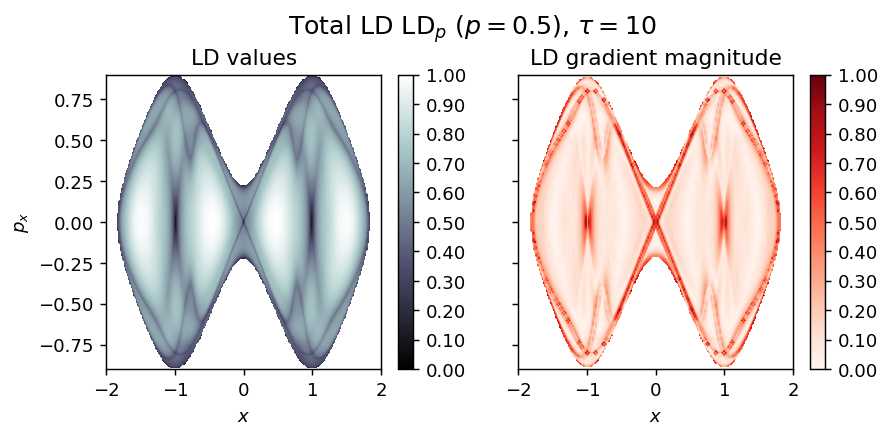

In [16]:
draw_lagrangian_descriptor(LD_total, 'total', grid_parameters, tau, p_value, colormap_name='bone')

### Slice: $x - p_x$, with $H_0 = +0.1, y=0, p_y > 0$

In [66]:
# Integration parameters
t0 = 0
tau = 12

# Lp-norm, p-value
p_value = 1/2

# Mesh visualisation slice parameters
H0 = 0.1 # Energy

ax1_min,ax1_max = [-2, 2]
ax2_min,ax2_max = [-1.25, 1.25]
N1, N2 = [200, 200]

# Box escape condition
box_boundaries = False

# Miscellaneous grid parameters
dims_fixed = [0,1,0,0] # Variable ordering (x y p_x p_y)
dims_fixed_values = [0] # This can also be an array of values
dims_slice = [1,0,1,0] # Visualisation slice
momentum_sign = 1 # Direction of momentum that defines the slice - (1) positive / (-1) negative

In [67]:
potential_energy = cirque_potential
vector_field = cirque_vector_field

slice_parameters = [[ax1_min, ax1_max, N1],[ax2_min, ax2_max, N2]]

grid_parameters = {
        'slice_parameters' : slice_parameters,
        'dims_slice' : dims_slice,
        'dims_fixed' : [dims_fixed, dims_fixed_values],
        'momentum_sign' : momentum_sign,
        'potential_energy': potential_energy,
        'energy_level': H0
    }

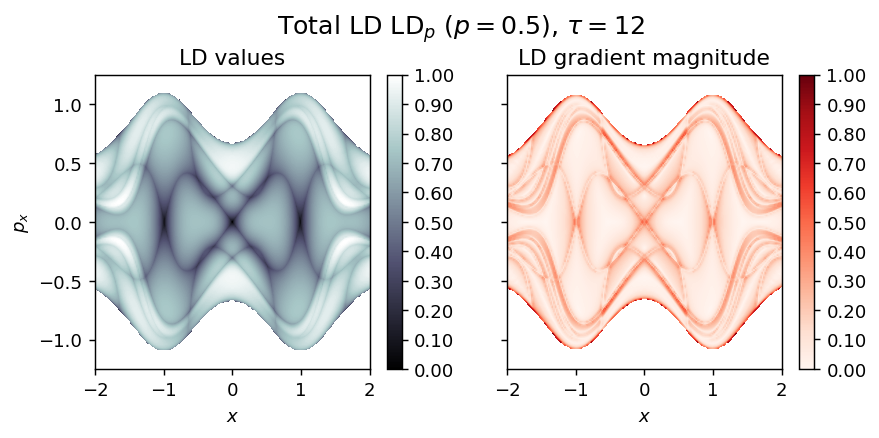

In [68]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
# draw_lagrangian_descriptor(LD_forward, 'forward', grid_parameters, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)
# draw_lagrangian_descriptor(LD_backward, 'backward', grid_parameters, tau, p_value)

LD_total = LD_forward + LD_backward
draw_lagrangian_descriptor(LD_total, 'total', grid_parameters, tau, p_value)

### Slice: $y - p_y$, with $H_0 = -0.1, x=1, p_x > 0$

In [55]:
# Integration parameters
t0 = 0
tau = 10#12

# Lp-norm, p-value
p_value = 1/2

# Mesh visualisation slice parameters
H0 = -0.1 # Energy

ax1_min,ax1_max = [-1, 1]
ax2_min,ax2_max = [-0.9, 0.9]
N1, N2 = [200, 200]

# Box escape condition
box_boundaries = False

# Miscellaneous grid parameters
dims_fixed = [1,0,0,0] # Variable ordering (x y p_x p_y)
dims_fixed_values = [1] # This can also be an array of values
dims_slice = [0,1,0,1] # Visualisation slice.
momentum_sign = 1 # Direction of momentum that defines the slice - (1) positive / (-1) negative

In [56]:
potential_energy = cirque_potential
vector_field = cirque_vector_field

slice_parameters = [[ax1_min, ax1_max, N1],[ax2_min, ax2_max, N2]]

grid_parameters = {
        'slice_parameters' : slice_parameters,
        'dims_slice' : dims_slice,
        'dims_fixed' : [dims_fixed, dims_fixed_values],
        'momentum_sign' : momentum_sign,
        'potential_energy': potential_energy,
        'energy_level': H0
    }

In [57]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)
LD_total = LD_forward + LD_backward

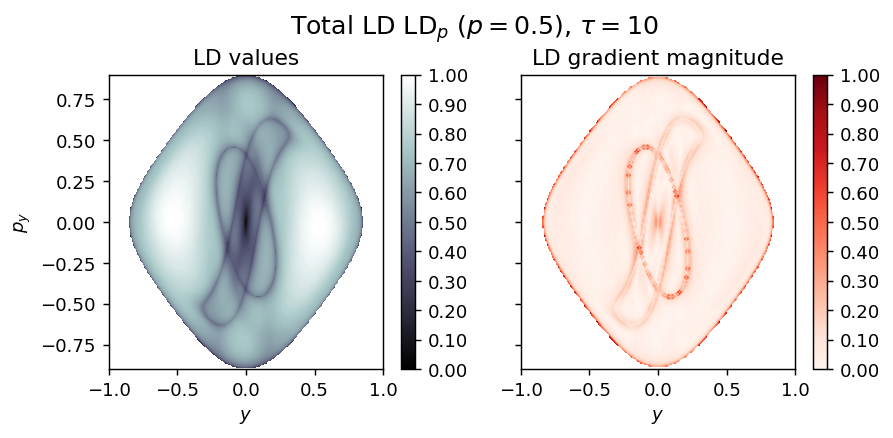

In [58]:
draw_lagrangian_descriptor(LD_total, 'total', grid_parameters, tau, p_value)

### Slice: $y - p_y$, with $H_0 = +0.1, x=1, p_x > 0$

In [73]:
# Integration parameters
t0 = 0
tau = 12

# Lp-norm, p-value
p_value = 1/2

# Mesh visualisation slice parameters
H0 = 0.1 # Energy

ax1_min,ax1_max = [-4, 4]
ax2_min,ax2_max = [-1.25, 1.25]
N1, N2 = [200, 200]

# Box escape condition
box_boundaries = False

# Miscellaneous grid parameters
dims_fixed = [1,0,0,0] # Variable ordering (x y p_x p_y)
dims_fixed_values = [1] # This can also be an array of values
dims_slice = [0,1,0,1] # Visualisation slice.
momentum_sign = 1 # Direction of momentum that defines the slice - (1) positive / (-1) negative

In [74]:
potential_energy = cirque_potential
vector_field = cirque_vector_field

slice_parameters = [[ax1_min, ax1_max, N1],[ax2_min, ax2_max, N2]]

grid_parameters = {
        'slice_parameters' : slice_parameters,
        'dims_slice' : dims_slice,
        'dims_fixed' : [dims_fixed, dims_fixed_values],
        'momentum_sign' : momentum_sign,
        'potential_energy': potential_energy,
        'energy_level': H0
    }

In [75]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
# draw_lagrangian_descriptor(LD_forward, 'forward', grid_parameters, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)
# draw_lagrangian_descriptor(LD_backward, 'backward', grid_parameters, tau, p_value)

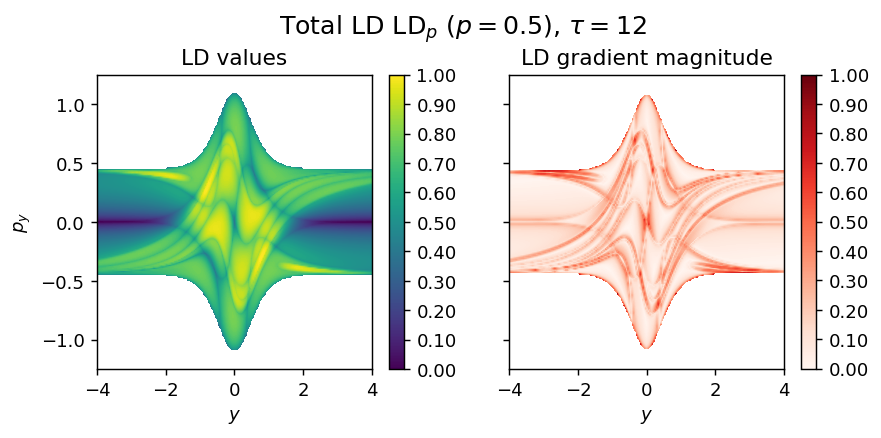

In [76]:
LD_total = LD_forward + LD_backward
draw_lagrangian_descriptor(LD_total, 'total', grid_parameters, tau, p_value, colormap_name='viridis')

### Slice: $x - y$, with $H_0 = +0.1, p_x = 0, p_y > 0$

In [88]:
# Integration parameters
t0 = 0
tau = 12

# Lp-norm, p-value
p_value = 1/2

# Mesh visualisation slice parameters
H0 = 0.1 # Energy

ax1_min,ax1_max = [-2, 2]
ax2_min,ax2_max = [-1.25, 1.25]
N1, N2 = [200, 200]

# Box escape condition
box_boundaries = False

# Miscellaneous grid parameters
dims_fixed = [0,0,1,0] # Variable ordering (x y p_x p_y)
dims_fixed_values = [0] # This can also be an array of values
dims_slice = [1,1,0,0] # Visualisation slice.
momentum_sign = 1 # Direction of momentum that defines the slice - (1) positive / (-1) negative

In [89]:
potential_energy = cirque_potential
vector_field = cirque_vector_field

slice_parameters = [[ax1_min, ax1_max, N1],[ax2_min, ax2_max, N2]]

grid_parameters = {
        'slice_parameters' : slice_parameters,
        'dims_slice' : dims_slice,
        'dims_fixed' : [dims_fixed, dims_fixed_values],
        'momentum_sign' : momentum_sign,
        'potential_energy': potential_energy,
        'energy_level': H0
    }

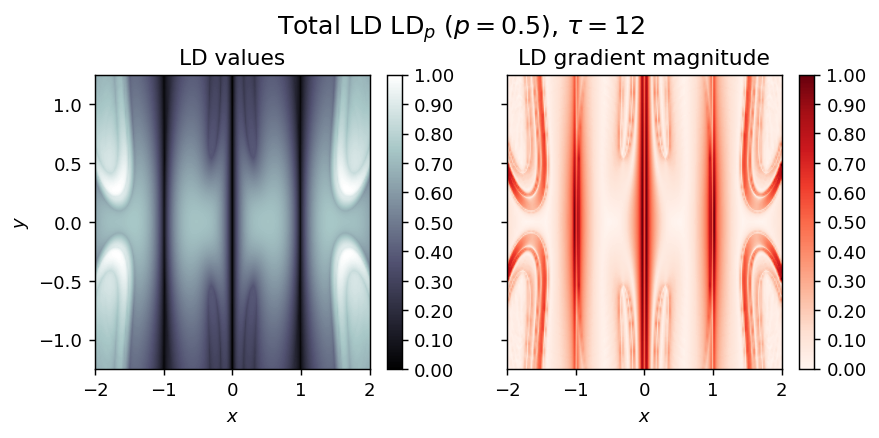

In [90]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
# draw_lagrangian_descriptor(LD_forward, 'forward', grid_parameters, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)
# draw_lagrangian_descriptor(LD_backward, 'backward', grid_parameters, tau, p_value)

LD_total = LD_forward + LD_backward
draw_lagrangian_descriptor(LD_total, 'total', grid_parameters, tau, p_value)

# LD maps and Pitchfork bifurcation of the PES

In [5]:
import pylds
from pylds.base import compute_lagrangian_descriptor, perturb_field
from pylds.tools import draw_lagrangian_descriptor

## Slice: $x - p_x$, with $H_0 = -0.1, y=0, p_y > 0$

In [24]:
# Integration parameters
t0 = 0
tau = 10

# Lp-norm, p-value
p_value = 1/2

# Mesh visualisation slice parameters
H0 = -0.1 # Energy

ax1_min,ax1_max = [-2, 2]
ax2_min,ax2_max = [-0.9, 0.9]
N1, N2 = [600, 600]

# Box escape condition
box_boundaries = False

# Miscellaneous grid parameters
dims_fixed = [0,1,0,0] # Variable ordering (x y p_x p_y)
dims_fixed_values = [0] # This can also be an array of values
dims_slice = [1,0,1,0] # Visualisation slice
momentum_sign = 1 # Direction of momentum that defines the slice - (1) positive / (-1) negative

### k = 1

In [25]:
tau = 12

In [26]:
# potential parameters
W, k, d = [0.5, 1, 1]

In [27]:
potential_energy = lambda u: cirque_potential(u, PARAMETERS=[W, k, d])
vector_field = lambda t, u: cirque_vector_field(t, u, PARAMETERS=[W, k, d])

slice_parameters = [[ax1_min, ax1_max, N1],[ax2_min, ax2_max, N2]]

grid_parameters = {
        'slice_parameters' : slice_parameters,
        'dims_slice' : dims_slice,
        'dims_fixed' : [dims_fixed, dims_fixed_values],
        'momentum_sign' : momentum_sign,
        'potential_energy': potential_energy,
        'energy_level': H0
    }

In [28]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)
LD_total = LD_forward + LD_backward

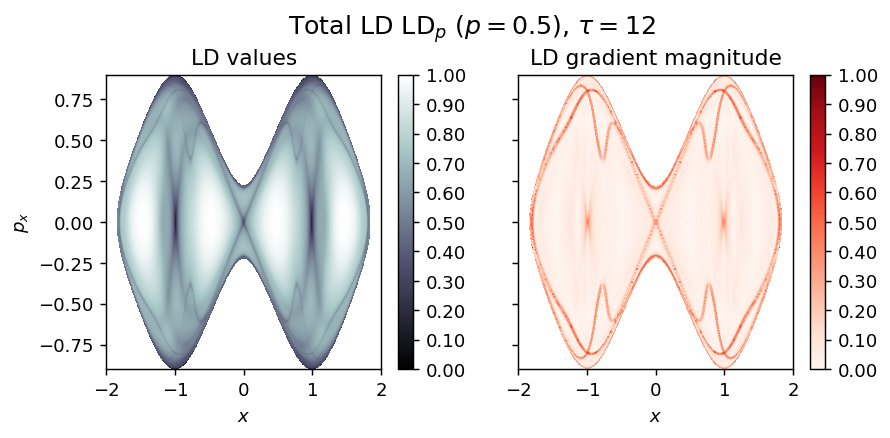

In [29]:
draw_lagrangian_descriptor(LD_total, 'total', grid_parameters, tau, p_value, colormap_name='bone',colormap_mode=1)

### k = 1.5

In [105]:
tau = 12

In [106]:
# potential parameters
W, k, d = [0.5, 1.5, 1]

In [107]:
potential_energy = lambda u: cirque_potential(u, PARAMETERS=[W, k, d])
vector_field = lambda t, u: cirque_vector_field(t, u, PARAMETERS=[W, k, d])

slice_parameters = [[ax1_min, ax1_max, N1],[ax2_min, ax2_max, N2]]

grid_parameters = {
        'slice_parameters' : slice_parameters,
        'dims_slice' : dims_slice,
        'dims_fixed' : [dims_fixed, dims_fixed_values],
        'momentum_sign' : momentum_sign,
        'potential_energy': potential_energy,
        'energy_level': H0
    }

In [108]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)
LD_total = LD_forward + LD_backward

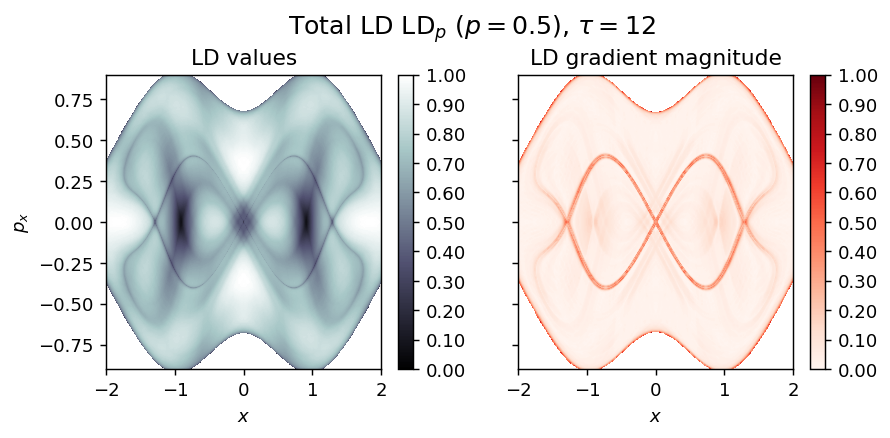

In [109]:
draw_lagrangian_descriptor(LD_total, 'total', grid_parameters, tau, p_value, colormap_name='bone',colormap_mode=1)

### k = 2

In [110]:
tau = 12

In [53]:
# potential parameters
W, k, d = [0.5, 2, 1]

In [54]:
potential_energy = lambda u: cirque_potential(u, PARAMETERS=[W, k, d])
vector_field = lambda t, u: cirque_vector_field(t, u, PARAMETERS=[W, k, d])

slice_parameters = [[ax1_min, ax1_max, N1],[ax2_min, ax2_max, N2]]

grid_parameters = {
        'slice_parameters' : slice_parameters,
        'dims_slice' : dims_slice,
        'dims_fixed' : [dims_fixed, dims_fixed_values],
        'momentum_sign' : momentum_sign,
        'potential_energy': potential_energy,
        'energy_level': H0
    }

In [55]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)
LD_total = LD_forward + LD_backward

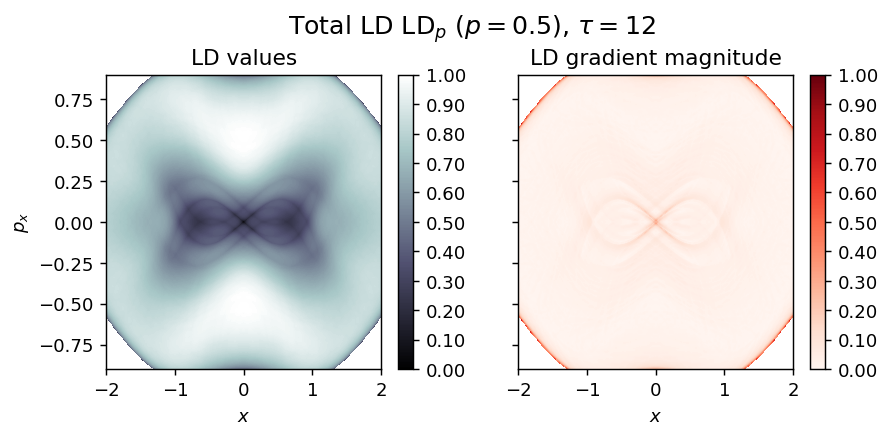

In [56]:
draw_lagrangian_descriptor(LD_total, 'total', grid_parameters, tau, p_value, colormap_name='bone',colormap_mode=1)

### k = $\sqrt{7}$

In [162]:
tau = 50

In [163]:
# potential parameters
W, k, d = [0.5, np.sqrt(7), 1]

In [164]:
potential_energy = lambda u: cirque_potential(u, PARAMETERS=[W, k, d])
vector_field = lambda t, u: cirque_vector_field(t, u, PARAMETERS=[W, k, d])

slice_parameters = [[ax1_min, ax1_max, N1],[ax2_min, ax2_max, N2]]

grid_parameters = {
        'slice_parameters' : slice_parameters,
        'dims_slice' : dims_slice,
        'dims_fixed' : [dims_fixed, dims_fixed_values],
        'momentum_sign' : momentum_sign,
        'potential_energy': potential_energy,
        'energy_level': H0
    }

In [165]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)
LD_total = LD_forward + LD_backward

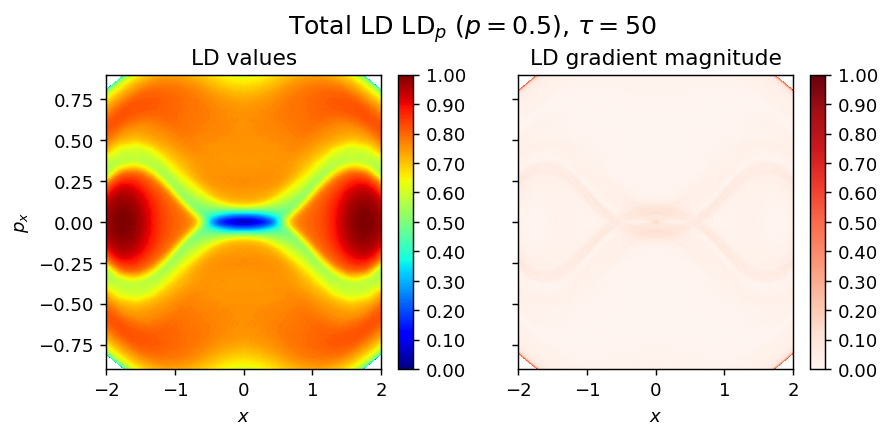

In [166]:
draw_lagrangian_descriptor(LD_total, 'total', grid_parameters, tau, p_value, colormap_name='jet')

### k = 3

In [110]:
tau = 12

In [61]:
# potential parameters
W, k, d = [0.5, 3, 1]

In [62]:
potential_energy = lambda u: cirque_potential(u, PARAMETERS=[W, k, d])
vector_field = lambda t, u: cirque_vector_field(t, u, PARAMETERS=[W, k, d])

slice_parameters = [[ax1_min, ax1_max, N1],[ax2_min, ax2_max, N2]]

grid_parameters = {
        'slice_parameters' : slice_parameters,
        'dims_slice' : dims_slice,
        'dims_fixed' : [dims_fixed, dims_fixed_values],
        'momentum_sign' : momentum_sign,
        'potential_energy': potential_energy,
        'energy_level': H0
    }

In [63]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)
LD_total = LD_forward + LD_backward

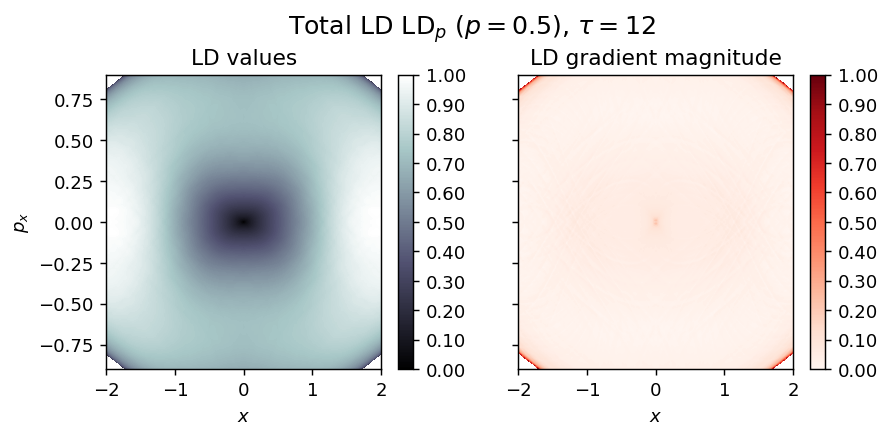

In [64]:
draw_lagrangian_descriptor(LD_total, 'total', grid_parameters, tau, p_value, colormap_name='bone',colormap_mode=1)

## Variable energy, k critical value

### E = -0.2, $x-p_x$ slice

In [30]:
# Mesh visualisation slice parameters
H0 = -0.2 # Energy

In [42]:
# integration parameters
tau = 50

# Lp-norm, p-value
p_value = 1/2

ax1_min,ax1_max = [-3, 3]
ax2_min,ax2_max = [-1.25, 1.25]
N1, N2 = [300, 300]

# Box escape condition
box_boundaries = False

# Miscellaneous grid parameters
dims_fixed = [0,1,0,0] # Variable ordering (x y p_x p_y)
dims_fixed_values = [0] # This can also be an array of values
dims_slice = [1,0,1,0] # Visualisation slice
momentum_sign = 1 # Direction of momentum that defines the slice - (1) positive / (-1) negative

In [43]:
# potential parameters
W, k, d = [0.5, np.sqrt(7), 1]

In [44]:
potential_energy = lambda u: cirque_potential(u, PARAMETERS=[W, k, d])
vector_field = lambda t, u: cirque_vector_field(t, u, PARAMETERS=[W, k, d])

slice_parameters = [[ax1_min, ax1_max, N1],[ax2_min, ax2_max, N2]]

grid_parameters = {
        'slice_parameters' : slice_parameters,
        'dims_slice' : dims_slice,
        'dims_fixed' : [dims_fixed, dims_fixed_values],
        'momentum_sign' : momentum_sign,
        'potential_energy': potential_energy,
        'energy_level': H0
    }

In [45]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)
LD_total = LD_forward + LD_backward

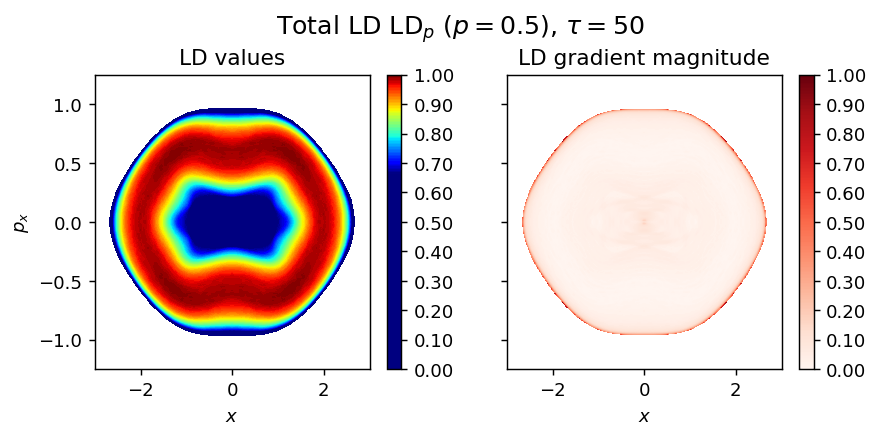

In [51]:
draw_lagrangian_descriptor(LD_total, 'total', grid_parameters, tau, p_value, colormap_name='jet',colormap_mode=2)

### E = -0.2, $y-p_y$ slice

In [30]:
# Mesh visualisation slice parameters
H0 = -0.2 # Energy

In [52]:
# integration parameters
tau = 50

# Lp-norm, p-value
p_value = 1/2

ax1_min,ax1_max = [-3, 3]
ax2_min,ax2_max = [-1.25, 1.25]
N1, N2 = [300, 300]

# Box escape condition
box_boundaries = False

# Miscellaneous grid parameters
dims_fixed = [1,0,0,0] # Variable ordering (x y p_x p_y)
dims_fixed_values = [0] # This can also be an array of values
dims_slice = [0,1,0,1] # Visualisation slice
momentum_sign = 1 # Direction of momentum that defines the slice - (1) positive / (-1) negative

In [53]:
# potential parameters
W, k, d = [0.5, np.sqrt(7), 1]

In [54]:
potential_energy = lambda u: cirque_potential(u, PARAMETERS=[W, k, d])
vector_field = lambda t, u: cirque_vector_field(t, u, PARAMETERS=[W, k, d])

slice_parameters = [[ax1_min, ax1_max, N1],[ax2_min, ax2_max, N2]]

grid_parameters = {
        'slice_parameters' : slice_parameters,
        'dims_slice' : dims_slice,
        'dims_fixed' : [dims_fixed, dims_fixed_values],
        'momentum_sign' : momentum_sign,
        'potential_energy': potential_energy,
        'energy_level': H0
    }

In [55]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)
LD_total = LD_forward + LD_backward

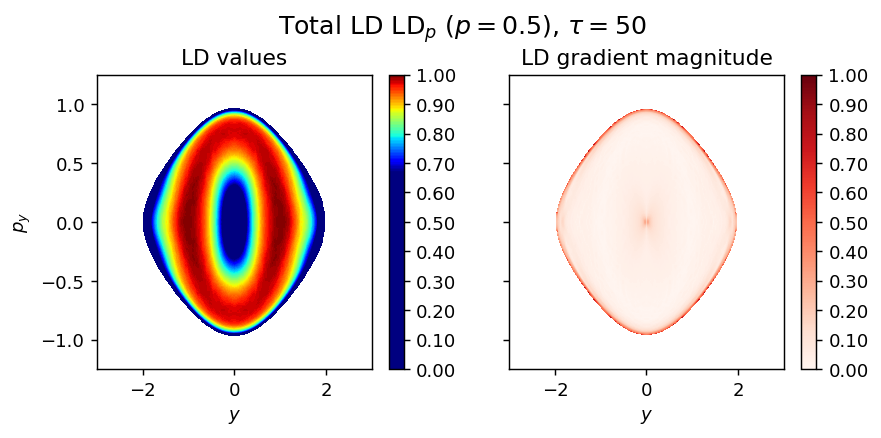

In [60]:
draw_lagrangian_descriptor(LD_total, 'total', grid_parameters, tau, p_value, colormap_name='jet',colormap_mode=2)

### E = -0.1, $x-p_x$ slice

In [61]:
# Mesh visualisation slice parameters
H0 = -0.1 # Energy

In [67]:
# integration parameters
tau = 50

# Lp-norm, p-value
p_value = 1/2

ax1_min,ax1_max = [-3.5, 3.5]
ax2_min,ax2_max = [-1.25, 1.25]
N1, N2 = [300, 300]

# Box escape condition
box_boundaries = False

# Miscellaneous grid parameters
dims_fixed = [0,1,0,0] # Variable ordering (x y p_x p_y)
dims_fixed_values = [0] # This can also be an array of values
dims_slice = [1,0,1,0] # Visualisation slice
momentum_sign = 1 # Direction of momentum that defines the slice - (1) positive / (-1) negative

In [68]:
# potential parameters
W, k, d = [0.5, np.sqrt(7), 1]

In [69]:
potential_energy = lambda u: cirque_potential(u, PARAMETERS=[W, k, d])
vector_field = lambda t, u: cirque_vector_field(t, u, PARAMETERS=[W, k, d])

slice_parameters = [[ax1_min, ax1_max, N1],[ax2_min, ax2_max, N2]]

grid_parameters = {
        'slice_parameters' : slice_parameters,
        'dims_slice' : dims_slice,
        'dims_fixed' : [dims_fixed, dims_fixed_values],
        'momentum_sign' : momentum_sign,
        'potential_energy': potential_energy,
        'energy_level': H0
    }

In [70]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)
LD_total = LD_forward + LD_backward

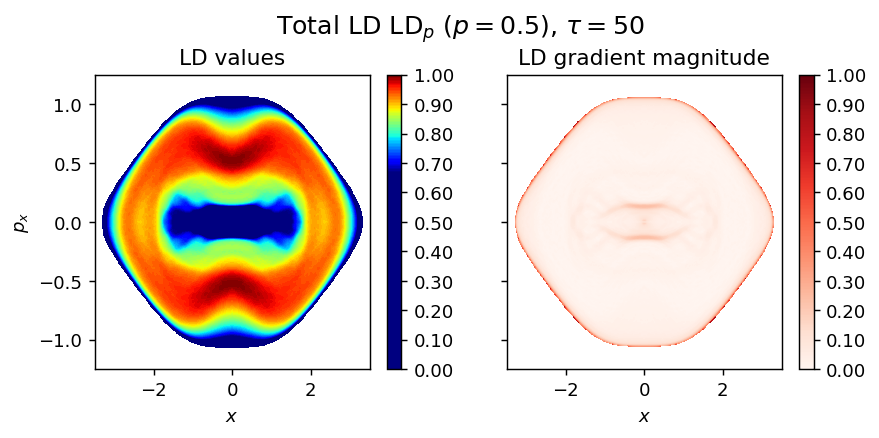

In [71]:
draw_lagrangian_descriptor(LD_total, 'total', grid_parameters, tau, p_value, colormap_name='jet',colormap_mode=2)

### E = -0.1, $y-p_y$ slice

In [72]:
# Mesh visualisation slice parameters
H0 = -0.1 # Energy

In [73]:
# integration parameters
tau = 50

# Lp-norm, p-value
p_value = 1/2

ax1_min,ax1_max = [-3, 3]
ax2_min,ax2_max = [-1.25, 1.25]
N1, N2 = [300, 300]

# Box escape condition
box_boundaries = False

# Miscellaneous grid parameters
dims_fixed = [1,0,0,0] # Variable ordering (x y p_x p_y)
dims_fixed_values = [0] # This can also be an array of values
dims_slice = [0,1,0,1] # Visualisation slice
momentum_sign = 1 # Direction of momentum that defines the slice - (1) positive / (-1) negative

In [74]:
# potential parameters
W, k, d = [0.5, np.sqrt(7), 1]

In [75]:
potential_energy = lambda u: cirque_potential(u, PARAMETERS=[W, k, d])
vector_field = lambda t, u: cirque_vector_field(t, u, PARAMETERS=[W, k, d])

slice_parameters = [[ax1_min, ax1_max, N1],[ax2_min, ax2_max, N2]]

grid_parameters = {
        'slice_parameters' : slice_parameters,
        'dims_slice' : dims_slice,
        'dims_fixed' : [dims_fixed, dims_fixed_values],
        'momentum_sign' : momentum_sign,
        'potential_energy': potential_energy,
        'energy_level': H0
    }

In [76]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)
LD_total = LD_forward + LD_backward

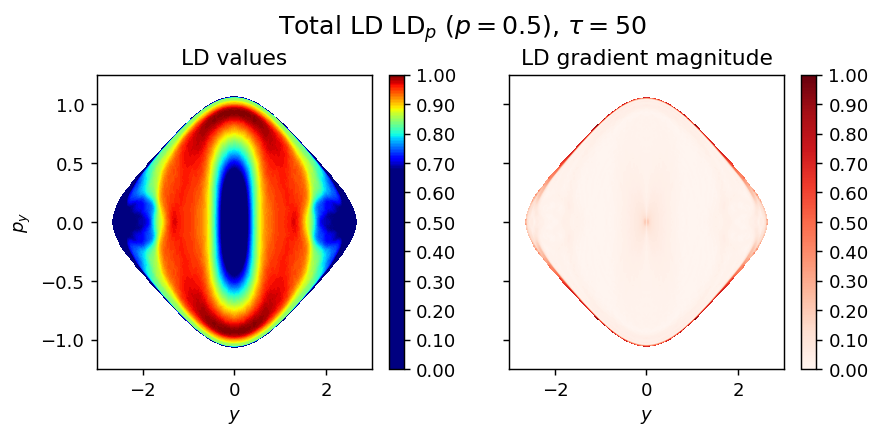

In [77]:
draw_lagrangian_descriptor(LD_total, 'total', grid_parameters, tau, p_value, colormap_name='jet',colormap_mode=2)

### E = -0.05, $x-p_x$ slice

In [90]:
# Mesh visualisation slice parameters
H0 = -0.05 # Energy

In [91]:
# integration parameters
tau = 50

# Lp-norm, p-value
p_value = 1/2

ax1_min,ax1_max = [-4.25, 4.25]
ax2_min,ax2_max = [-1.25, 1.25]
N1, N2 = [300, 300]

# Box escape condition
box_boundaries = False

# Miscellaneous grid parameters
dims_fixed = [0,1,0,0] # Variable ordering (x y p_x p_y)
dims_fixed_values = [0] # This can also be an array of values
dims_slice = [1,0,1,0] # Visualisation slice
momentum_sign = 1 # Direction of momentum that defines the slice - (1) positive / (-1) negative

In [92]:
# potential parameters
W, k, d = [0.5, np.sqrt(7), 1]

In [93]:
potential_energy = lambda u: cirque_potential(u, PARAMETERS=[W, k, d])
vector_field = lambda t, u: cirque_vector_field(t, u, PARAMETERS=[W, k, d])

slice_parameters = [[ax1_min, ax1_max, N1],[ax2_min, ax2_max, N2]]

grid_parameters = {
        'slice_parameters' : slice_parameters,
        'dims_slice' : dims_slice,
        'dims_fixed' : [dims_fixed, dims_fixed_values],
        'momentum_sign' : momentum_sign,
        'potential_energy': potential_energy,
        'energy_level': H0
    }

In [94]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)
LD_total = LD_forward + LD_backward

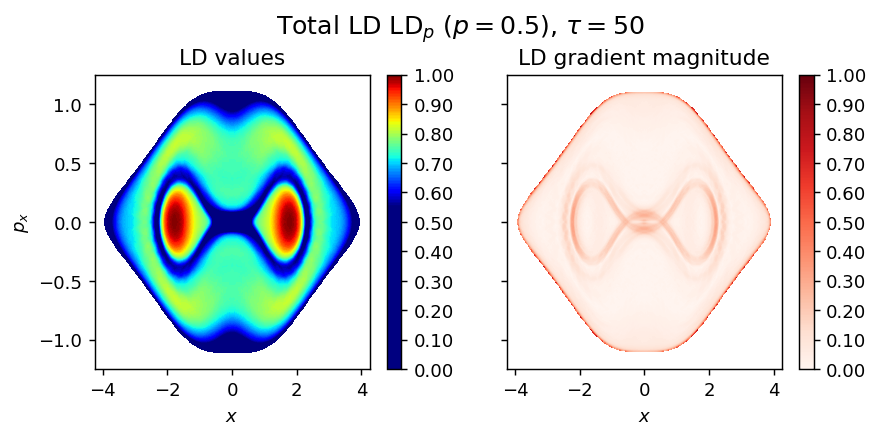

In [95]:
draw_lagrangian_descriptor(LD_total, 'total', grid_parameters, tau, p_value, colormap_name='jet',colormap_mode=2)

### E = -0.05, $y-p_y$ slice

In [96]:
# Mesh visualisation slice parameters
H0 = -0.05 # Energy

In [97]:
# integration parameters
tau = 50

# Lp-norm, p-value
p_value = 1/2

ax1_min,ax1_max = [-3.25, 3.25]
ax2_min,ax2_max = [-1.25, 1.25]
N1, N2 = [300, 300]

# Box escape condition
box_boundaries = False

# Miscellaneous grid parameters
dims_fixed = [1,0,0,0] # Variable ordering (x y p_x p_y)
dims_fixed_values = [0] # This can also be an array of values
dims_slice = [0,1,0,1] # Visualisation slice
momentum_sign = 1 # Direction of momentum that defines the slice - (1) positive / (-1) negative

In [98]:
# potential parameters
W, k, d = [0.5, np.sqrt(7), 1]

In [99]:
potential_energy = lambda u: cirque_potential(u, PARAMETERS=[W, k, d])
vector_field = lambda t, u: cirque_vector_field(t, u, PARAMETERS=[W, k, d])

slice_parameters = [[ax1_min, ax1_max, N1],[ax2_min, ax2_max, N2]]

grid_parameters = {
        'slice_parameters' : slice_parameters,
        'dims_slice' : dims_slice,
        'dims_fixed' : [dims_fixed, dims_fixed_values],
        'momentum_sign' : momentum_sign,
        'potential_energy': potential_energy,
        'energy_level': H0
    }

In [100]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)
LD_total = LD_forward + LD_backward

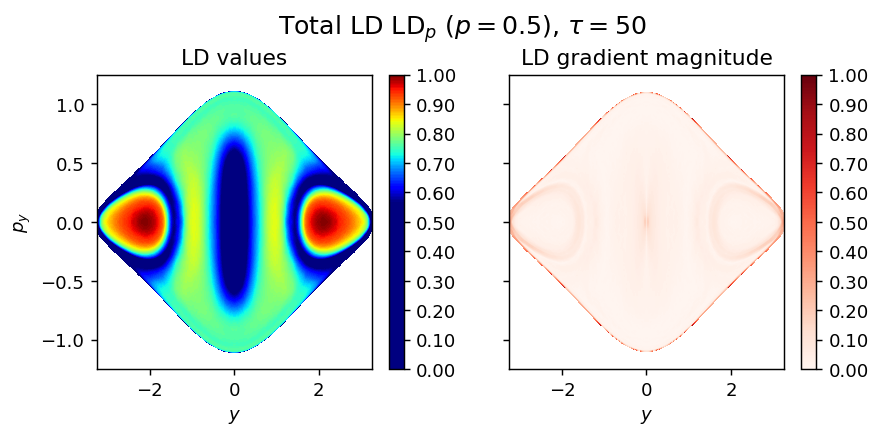

In [101]:
draw_lagrangian_descriptor(LD_total, 'total', grid_parameters, tau, p_value, colormap_name='jet',colormap_mode=2)

### E = -0.01, $x-p_x$ slice

In [114]:
# Mesh visualisation slice parameters
H0 = -0.01 # Energy

In [137]:
# integration parameters
tau = 50

# Lp-norm, p-value
p_value = 1/2

ax1_min,ax1_max = [-5.5, 5.5]
ax2_min,ax2_max = [-1.25, 1.25]
N1, N2 = [600, 600]

# Box escape condition
box_boundaries = False

# Miscellaneous grid parameters
dims_fixed = [0,1,0,0] # Variable ordering (x y p_x p_y)
dims_fixed_values = [0] # This can also be an array of values
dims_slice = [1,0,1,0] # Visualisation slice
momentum_sign = 1 # Direction of momentum that defines the slice - (1) positive / (-1) negative

In [138]:
# potential parameters
W, k, d = [0.5, np.sqrt(7), 1]

In [139]:
potential_energy = lambda u: cirque_potential(u, PARAMETERS=[W, k, d])
vector_field = lambda t, u: cirque_vector_field(t, u, PARAMETERS=[W, k, d])

slice_parameters = [[ax1_min, ax1_max, N1],[ax2_min, ax2_max, N2]]

grid_parameters = {
        'slice_parameters' : slice_parameters,
        'dims_slice' : dims_slice,
        'dims_fixed' : [dims_fixed, dims_fixed_values],
        'momentum_sign' : momentum_sign,
        'potential_energy': potential_energy,
        'energy_level': H0
    }

In [140]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)
LD_total = LD_forward + LD_backward

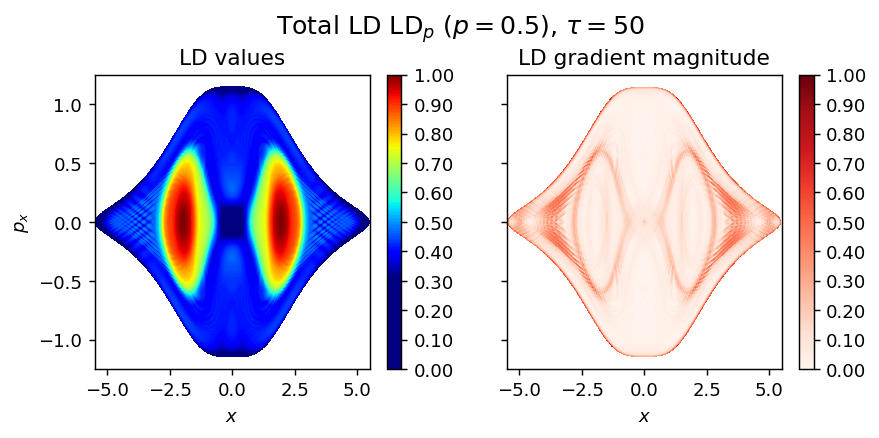

In [141]:
draw_lagrangian_descriptor(LD_total, 'total', grid_parameters, tau, p_value, colormap_name='jet',colormap_mode=2)

### E = -0.01, $y-p_y$ slice

In [145]:
# Mesh visualisation slice parameters
H0 = -0.01 # Energy

In [146]:
# integration parameters
tau = 50

# Lp-norm, p-value
p_value = 1/2

ax1_min,ax1_max = [-5.5, 5.5]
ax2_min,ax2_max = [-1.25, 1.25]
N1, N2 = [300, 300]

# Box escape condition
box_boundaries = False

# Miscellaneous grid parameters
dims_fixed = [1,0,0,0] # Variable ordering (x y p_x p_y)
dims_fixed_values = [0] # This can also be an array of values
dims_slice = [0,1,0,1] # Visualisation slice
momentum_sign = 1 # Direction of momentum that defines the slice - (1) positive / (-1) negative

In [147]:
# potential parameters
W, k, d = [0.5, np.sqrt(7), 1]

In [148]:
potential_energy = lambda u: cirque_potential(u, PARAMETERS=[W, k, d])
vector_field = lambda t, u: cirque_vector_field(t, u, PARAMETERS=[W, k, d])

slice_parameters = [[ax1_min, ax1_max, N1],[ax2_min, ax2_max, N2]]

grid_parameters = {
        'slice_parameters' : slice_parameters,
        'dims_slice' : dims_slice,
        'dims_fixed' : [dims_fixed, dims_fixed_values],
        'momentum_sign' : momentum_sign,
        'potential_energy': potential_energy,
        'energy_level': H0
    }

In [149]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)
LD_total = LD_forward + LD_backward

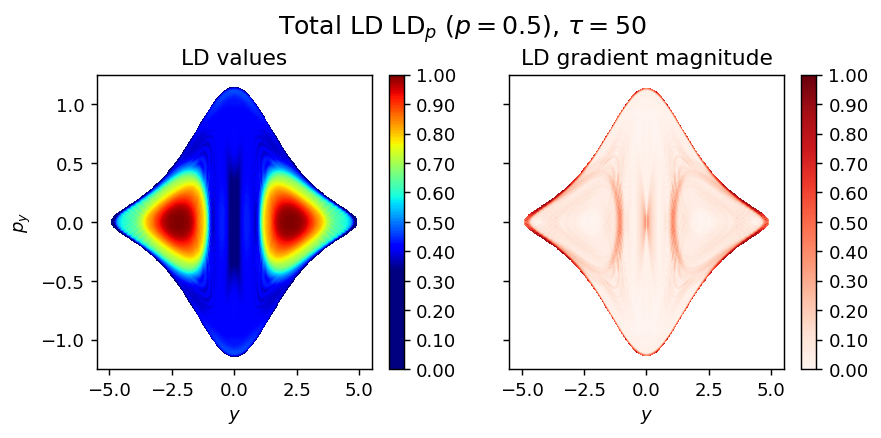

In [150]:
draw_lagrangian_descriptor(LD_total, 'total', grid_parameters, tau, p_value, colormap_name='jet',colormap_mode=2)

# Visualising Trajectories from IC's (2DoF)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pylds import energy_conservation_condition, vector_field_flat
from scipy.integrate import solve_ivp

## Define vector field 

Hamilton's equations

\begin{align*}
\dot{x}   &=  p_x\\
\dot{y}   &=  p_y\\
\dot{p}_x &= -6 W_0 k^6  \left( \frac{x + d}{(x + d)^2 + y^2 + k^2)^4} + \frac{x - d}{(x - d)^2 + y^2 + k^2)^4 }\right)\\
\dot{p}_y &= -6 W_0 k^6 y  \left( \frac{1}{((x + d)^2 + y^2 + k^2)^4} + \frac{1}{((x - d)^2 + y^2 + k^2)^4 } \right)
\end{align*}

In [2]:
def cirque_vector_field(t, u, PARAMETERS=[0.5, 1, 1]):
    """
    Returns 1D vector field of the Cirque system, for an array of points in phase space.
    Number of model parameters: 0 . PARAMETERS = [None]
    Functional form: v = (y, x - x**3), with u = (x, y)
    
    Parameters
    ----------  
    t : float
        fixed time-point of vector field, for all points in phase space.
        
    u : array_like, shape(n,)
        Points in phase space.
        
    PARAMETERS : list of floats
        Vector field parameters.
    
    Returns
    -------
    v : array_like, shape(n,)
        Vector field corresponding to points u, in phase space at time t.
    """
    N_dims = u.shape[-1]
    points_positions = u.T[:int(N_dims/2)]
    points_momenta = u.T[int(N_dims/2):]
    x, y = points_positions
    p_x, p_y = points_momenta 
    
    # Hamiltonian Model Parameter
    W0, k, d = PARAMETERS
    
    # Vector field defintion
    v_x   =  p_x
    v_y   =  p_y
    v_p_x = -6*W0*(k**6)* ( (x + d)/((x + d)**2 + y**2 + k**2)**4 + (x - d)/((x - d)**2 + y**2 + k**2)**4 )
    v_p_y = -6*W0*(k**6)* y * ( 1/((x + d)**2 + y**2 + k**2)**4 + 1/((x - d)**2 + y**2 + k**2)**4 )
    v = np.array([v_x, v_y, v_p_x, v_p_y]).T
    return v

## Define potential energy (PES) 

In [3]:
def cirque_potential(positions, PARAMETERS=[0.5, 1, 1]):
    x, y = positions.T
    
    # Function parameters
    W0, k, d = PARAMETERS
    
    # Potential energy function
    V = -W0*(k**6) * ( 1/((x + d)**2 + y**2 + k**2)**3 + 1/((x - d)**2 + y**2 + k**2)**3 )
    return V

## Set general input parameters

In [4]:
potential_energy = cirque_potential
vector_field = cirque_vector_field

In [6]:
N_dims = 4
box_boundaries = int(N_dims/2)*[[-np.infty, np.infty]] #restricted to configuration space

## Case: Single ICs

For the slice $x - p_x$, with fixed $y = 0$, and $p_x = 0.1$

The momentum $p_y$ is determined via energy conservation with _energy level_ $H_0$

In [106]:
x0 = 0 # Sampled from [0,1] interval
y0 = 0 # Fixed
px_0 = 0.1 # Sampled
py_0 = 0 # Using Energy conservation

In [107]:
H0 = -0.1 # Energy level
momentum_sign = 1
p_value = 1/2

In [108]:
phase_space_axes = np.array([ x0, y0 , px_0 , py_0 ]).reshape(N_dims,-1)

In [109]:
# Determine py_0
py_0 = energy_conservation_condition(phase_space_axes, H0, potential_energy, momentum_sign)
py_0 = py_0[0]

In [110]:
IC = np.transpose([x0, y0, px_0, py_0, 0])
IC = IC.flatten()
IC

array([0. , 0. , 0.1, 0.2, 0. ])

In [111]:
#solve initial value problem
f = lambda t, y: vector_field_flat(t, y, vector_field, p_value, box_boundaries)

In [112]:
tau_max = 61 #62 #67 #65 # 75 #80 #90 #100 # 110

dt = 0.1
time_span = (0,tau_max)
time_store = np.arange(0,tau_max,dt)

In [113]:
solution = solve_ivp(f, time_span, IC, t_eval=time_store, rtol=1.0e-4)
trajectory_positions = solution.y[:int(N_dims/2)]
trajectory_momenta = solution.y[int(N_dims/2):N_dims]

IC_positions = IC[:int(N_dims/2)]
IC_momenta = IC[int(N_dims/2):N_dims]

Plot trajectory and initial condition in configuration space $(x, y)$

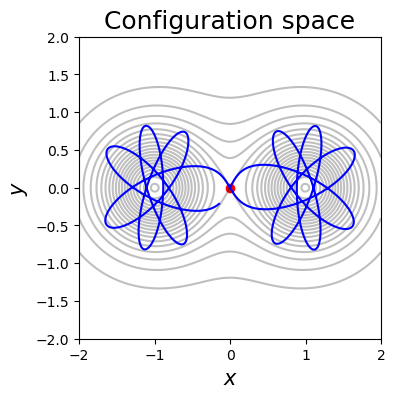

In [114]:
fig,ax = plt.subplots(1,1,dpi=100)

ax.plot(*trajectory_positions,'-',color='blue')
ax.scatter(*IC_positions,c='r')

ax.set_xlabel("$x$", fontsize=15)
ax.set_ylabel("$y$", fontsize=15)
ax.set_title("Configuration space", fontsize=18)

ax.contour(X,Y,-V,20,colors='black',alpha=0.25)

ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal')

plt.show()

Plot trajectory and initial condition in space of momenta $(p_x, p_y)$

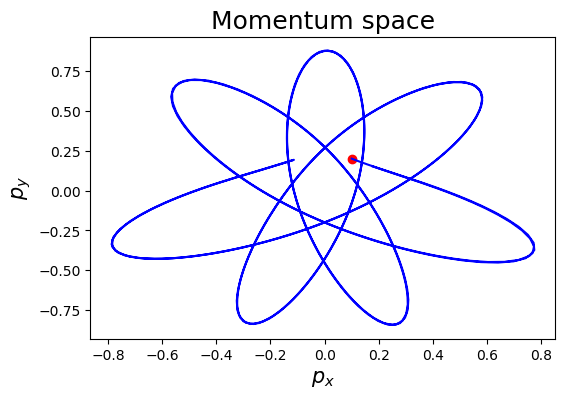

In [19]:
fig = plt.figure(dpi=100)

plt.plot(*trajectory_momenta,'-',color='blue')
plt.scatter(*IC_momenta,c='r')

plt.xlabel("$p_x$", fontsize=15)
plt.ylabel("$p_y$", fontsize=15)
plt.title("Momentum space", fontsize=18)

plt.show()

## Case: An array of ICs

# Example trajectories

## Equipotential lines

In [116]:
import numpy as np

Nx = 300
Ny = 300
x = np.linspace(-2,2, Nx)
y = np.linspace(-2,2, Nx)
X, Y = np.meshgrid(x,y)
points = np.transpose([X.flatten(), Y.flatten()])

In [117]:
potential_values = cirque_potential(points)
V = potential_values.reshape((Nx,Ny))

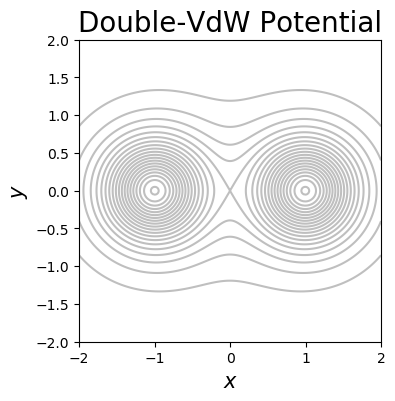

In [119]:
# Plot vector field
fig,ax = plt.subplots(1,1,dpi=100)

ax.set_title('Double-VdW Potential', fontsize=20)
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$y$', fontsize=15)
# c = ax.contour(X,Y,V,40,cmap='jet')
c = ax.contour(X,Y,-V,20,colors='black',alpha=0.25)

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
# plt.colorbar(c)
ax.set_aspect('equal')

plt.show()

## Case: Inter-well transport ($E=-0.1$)

In [167]:
x0 = 0 # Sampled from [0,1] interval
y0 = 0 # Fixed
px_0 = 0.1 # Sampled
py_0 = 0 # Using Energy conservation

In [168]:
H0 = -0.05 # Energy level
momentum_sign = 1
p_value = 1/2

In [169]:
phase_space_axes = np.array([ x0, y0 , px_0 , py_0 ]).reshape(N_dims,-1)

NameError: name 'N_dims' is not defined

In [170]:
# Determine py_0
py_0 = energy_conservation_condition(phase_space_axes, H0, potential_energy, momentum_sign)
py_0 = py_0[0]

NameError: name 'energy_conservation_condition' is not defined

In [110]:
IC = np.transpose([x0, y0, px_0, py_0, 0])
IC = IC.flatten()
IC

array([0. , 0. , 0.1, 0.2, 0. ])

In [111]:
#solve initial value problem
f = lambda t, y: vector_field_flat(t, y, vector_field, p_value, box_boundaries)

In [112]:
tau_max = 61 #62 #67 #65 # 75 #80 #90 #100 # 110

dt = 0.1
time_span = (0,tau_max)
time_store = np.arange(0,tau_max,dt)

In [113]:
solution = solve_ivp(f, time_span, IC, t_eval=time_store, rtol=1.0e-4)
trajectory_positions = solution.y[:int(N_dims/2)]
trajectory_momenta = solution.y[int(N_dims/2):N_dims]

IC_positions = IC[:int(N_dims/2)]
IC_momenta = IC[int(N_dims/2):N_dims]

Plot trajectory and initial condition in configuration space $(x, y)$

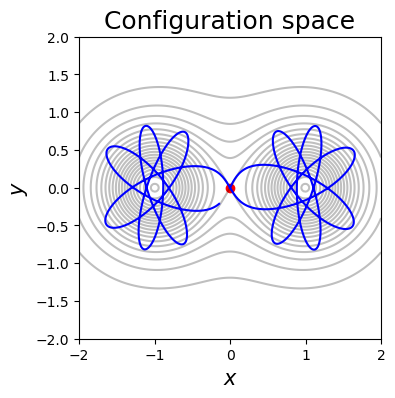

In [123]:
fig,ax = plt.subplots(1,1,dpi=100)

ax.plot(*trajectory_positions,'-',color='blue')
ax.scatter(*IC_positions,c='r')

ax.set_xlabel("$x$", fontsize=15)
ax.set_ylabel("$y$", fontsize=15)
ax.set_title("Configuration space", fontsize=18)

ax.contour(X,Y,-V,20,colors='black',alpha=0.25)

ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal')

fig.savefig('figures/traj_type2.png')

plt.show()

Plot trajectory and initial condition in space of momenta $(p_x, p_y)$

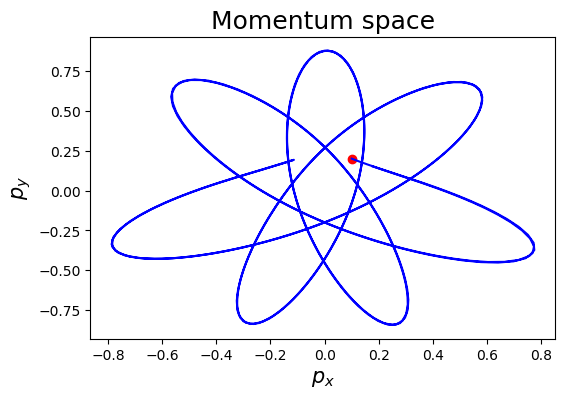

In [19]:
fig = plt.figure(dpi=100)

plt.plot(*trajectory_momenta,'-',color='blue')
plt.scatter(*IC_momenta,c='r')

plt.xlabel("$p_x$", fontsize=15)
plt.ylabel("$p_y$", fontsize=15)
plt.title("Momentum space", fontsize=18)

plt.show()

## Case: Scapping trajectory ($E = 0.01$)

In [124]:
x0 = 0 # Sampled from [0,1] interval
y0 = 0 # Fixed
px_0 = 0.1 # Sampled
py_0 = 0 # Using Energy conservation

In [125]:
H0 = 0.01 # Energy level
momentum_sign = 1
p_value = 1/2

In [126]:
phase_space_axes = np.array([ x0, y0 , px_0 , py_0 ]).reshape(N_dims,-1)

In [127]:
# Determine py_0
py_0 = energy_conservation_condition(phase_space_axes, H0, potential_energy, momentum_sign)
py_0 = py_0[0]
py_0

0.5099019513592785

In [128]:
IC = np.transpose([x0, y0, px_0, py_0, 0])
IC = IC.flatten()
IC

array([0.        , 0.        , 0.1       , 0.50990195, 0.        ])

In [129]:
#solve initial value problem
f = lambda t, y: vector_field_flat(t, y, vector_field, p_value, box_boundaries)

In [130]:
tau_max = 61 #62 #67 #65 # 75 #80 #90 #100 # 110

dt = 0.1
time_span = (0,tau_max)
time_store = np.arange(0,tau_max,dt)

In [131]:
solution = solve_ivp(f, time_span, IC, t_eval=time_store, rtol=1.0e-4)
trajectory_positions = solution.y[:int(N_dims/2)]
trajectory_momenta = solution.y[int(N_dims/2):N_dims]

IC_positions = IC[:int(N_dims/2)]
IC_momenta = IC[int(N_dims/2):N_dims]

Plot trajectory and initial condition in configuration space $(x, y)$

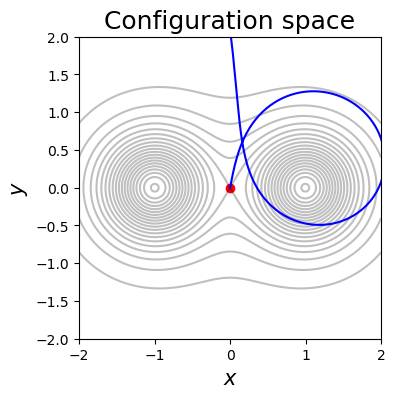

In [132]:
fig,ax = plt.subplots(1,1,dpi=100)

ax.plot(*trajectory_positions,'-',color='blue')
ax.scatter(*IC_positions,c='r')

ax.set_xlabel("$x$", fontsize=15)
ax.set_ylabel("$y$", fontsize=15)
ax.set_title("Configuration space", fontsize=18)

ax.contour(X,Y,-V,20,colors='black',alpha=0.25)

ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_aspect('equal')

fig.savefig('figures/traj_escapping.png')

plt.show()

Plot trajectory and initial condition in space of momenta $(p_x, p_y)$

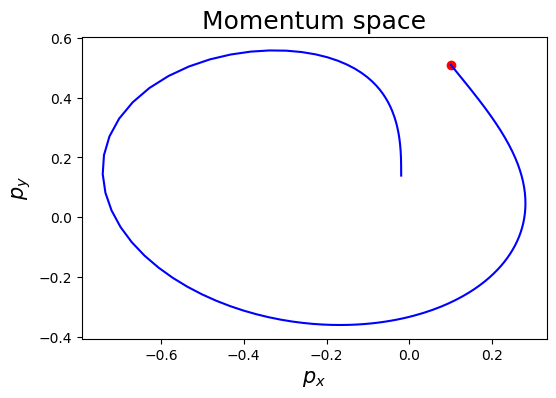

In [70]:
fig = plt.figure(dpi=100)

plt.plot(*trajectory_momenta,'-',color='blue')
plt.scatter(*IC_momenta,c='r')

plt.xlabel("$p_x$", fontsize=15)
plt.ylabel("$p_y$", fontsize=15)
plt.title("Momentum space", fontsize=18)

plt.show()

# Finding UPOs via bisection (F)

# Fate maps (F)

FIRST PROBLEM: How to define regions.

# (Exptl)Finding UPOs via local minimisation of LD function

In [76]:
import numpy as np

Nx = 300
Ny = 300
x = np.linspace(-2,2, Nx)
y = np.linspace(-1.5, 1.5, Nx)
X, Y = np.meshgrid(x,y)
points = np.transpose([X.flatten(), Y.flatten()])

In [77]:
potential_values = cirque_potential(points)
V = potential_values.reshape((Nx,Ny))

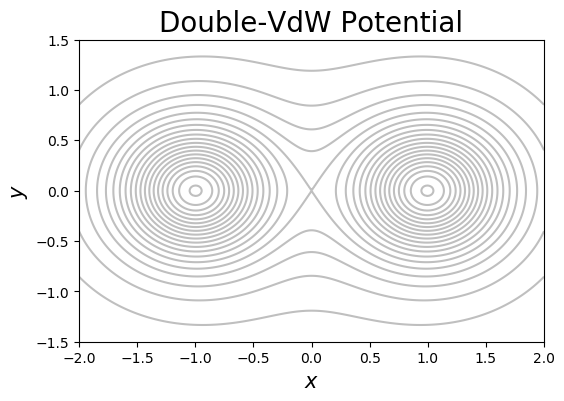

In [98]:
# Plot vector field
fig,ax = plt.subplots(1,1,dpi=100)

ax.set_title('Double-VdW Potential', fontsize=20)
ax.set_xlabel('$x$', fontsize=15)
ax.set_ylabel('$y$', fontsize=15)
# c = ax.contour(X,Y,V,40,cmap='jet')
c = ax.contour(X,Y,-V,20,colors='black',alpha=0.25)

ax.set_xlim(-2, 2)
ax.set_ylim(-1.5, 1.5)
# plt.colorbar(c)

plt.show()